# Task 2d - MLP

Objective of this task is to test the Multi Layer Perceptron classifier optimized in task 2b to check how it performs with MNIST-permutated dataset retreived from ILIAS, which has been permutated in an unknown manner.

## Loading the data

In [7]:
import glob
import imageio
import os
import numpy as np
from PIL import Image

training_perm = []
training_perm_labels = []
testing_perm = []
testing_perm_labels = []

First, converting MNIST-permutated dataset into flat numpy arrays:

In [8]:
# Loading training data for permutated set
for root, dirs, files in os.walk("../../../data/mnist-png-format-permutated/train"):
    for file in files:
        if file.endswith(".png"):
            # Retrieving label
            training_perm_labels.append(file[0])
            # Converting image to numpy array
            tmp_img = np.array(Image.open(os.path.join(root,file))).flatten()
            training_perm.append(tmp_img)

In [9]:
# Loading test data for permutated set
for root, dirs, files in os.walk("../../../data/mnist-png-format-permutated/test"):
    for file in files:
        if file.endswith(".png"):
            # Retrieving label
            testing_perm_labels.append(file[0])
            # Converting image to numpy array
            tmp_img = np.array(Image.open(os.path.join(root,file))).flatten()
            testing_perm.append(tmp_img)

In [10]:
# Converting to numpy 
training_perm = np.array(training_perm)
training_perm_labels = np.array(training_perm_labels)
testing_perm = np.array(testing_perm)
testing_perm_labels = np.array(testing_perm_labels)

Loading regular MNIST set

In [11]:
# Loading MNIST training set
with open('../../../data/mnist-csv-format/mnist_train.csv') as tr:
    training = np.loadtxt(tr, delimiter=',', dtype=int)
    training_samples = training[:, 1:]
    training_labels = training[:, 0]

In [12]:
# Loading MNIST test set
with open('../../../data/mnist-csv-format/mnist_test.csv') as ts:
    tests = np.loadtxt(ts, delimiter=',', dtype=int)
    test_samples = tests[:, 1:]
    test_labels = tests[:, 0]

## Getting MLP estimator

Retrieving two MLP estimators, trained on both datasets

In [13]:
from MLP import MLP
mlp = MLP()

estimator = mlp.get_estimator(training_samples, training_labels)

In [16]:
estimator_perm = mlp.get_estimator(training_perm, training_perm_labels)

Plotting the accuracy curves:

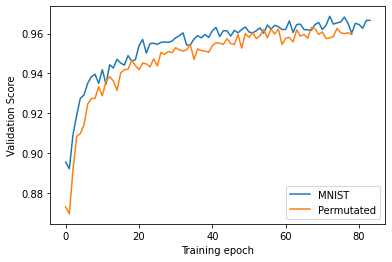

In [17]:
import matplotlib.pyplot as plt

plt.plot(estimator.validation_scores_)
plt.plot(estimator_perm.validation_scores_)
plt.legend(["MNIST", "Permutated"])
plt.xlabel("Training epoch")
plt.ylabel("Validation Score")
plt.savefig("mlp_taskd.png")
plt.show()

Although consistently less accurate, MLP trained on permutated data performs similarly to its original counterpart - differences in accuracy are however negligible, and training for permutated dataset stopped a little bit earlier.

In [19]:
from sklearn.metrics import accuracy_score
print(f"Accuracy on MNIST:\t\t{accuracy_score(test_labels, estimator.predict(test_samples))}")
print(f"Accuracy on MNIST-permutated:\t{accuracy_score(testing_perm_labels, estimator_perm.predict(testing_perm))}")

Accuracy on MNIST:		0.9652
Accuracy on MNIST-permutated:	0.9633


Difference in accuracies is minimal, with a slight advantage of an estimator trained on regular MNIST.  Since MLP doesn't convolve on the image, dealing with flatten vectors, it makes sense that performance doesn't deteriorate - given that the permutation is consistent, MLP adapts to this and produces similar results.